In [39]:
# # Unit 6 - Pythonic Monopoly
# Rental Analysis
# The first step to building the dashboard is to work out all of the calculations and visualizations in an analysis notebook. 
# Once the code is worked out here, it can be copied over to a dashboard code and used with 
# Panel to create the final layout. Use the rental_analysis.ipynb to complete the following:


In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [41]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

In [42]:
# Loading...

In [43]:
# Read the census data
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

In [69]:
# Housing Units Per Year
# calculate the number of housing units per year

In [79]:
sfo_data.groupby('year')['housing_units'].mean()



year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

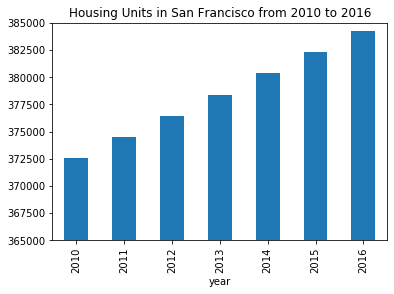

In [112]:
#  ... and visualize the results as a bar chart using the Pandas plot function.

# Note: By default, the limits auto-scale to the data. However, it is hard to see the difference between the yearly data.

#sfo_data.groupby('year')['housing_units'].mean().plot(kind='bar') < ==== this wont show accurate, see below

sfo_data.groupby('year')['housing_units'].mean().plot(kind='bar', ylim=(365000,385000), title='Housing Units in San Francisco from 2010 to 2016')

- - - 

In [ ]:
# Average Gross Rent in San Francisco Per Year
# In this section, visualize the average gross rent per year to better 
# understand the trends for rental income over time. 
# visualize the average (mean) gross rent per year and visualize it as a line chart.


In [88]:
# Calculate the mean gross for each year.
sfo_data.groupby(['year'])['gross_rent'].mean()

year
2010    1239
2011    1530
2012    2324
2013    2971
2014    3528
2015    3739
2016    4390
Name: gross_rent, dtype: int64

Text(0, 0.5, 'Average Gross Rent')

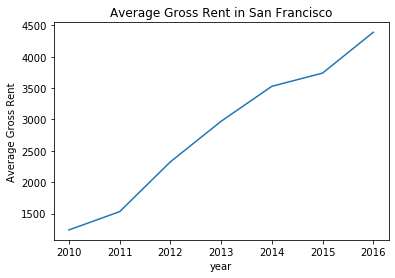

In [87]:
# Visualize the mean gross rent per year as a line chart.
sfo_data.groupby('year')['gross_rent'].mean().plot(kind='line', title='Average Gross Rent in San Francisco').set_ylabel('Average Gross Rent')

Text(0, 0.5, 'Average Sales Price')

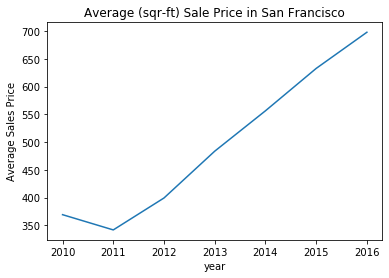

In [91]:
#  Average Sales Price Per Year
# determine the average sales price per year to better understand the sales price of the rental
# property over time. For example, a customer will want to know if they should expect an 
# increase or decrease in the property value over time so they can determine how long to hold the rental property. 
# You will visualize the average (mean) sales_price_sqr_foot and visualize it as a bar chart.

# Calculate the mean gross for each year.
# Visualize the mean gross rent per year as a line chart.

sfo_data.groupby('year')['sale_price_sqr_foot'].mean().plot(kind='line', title='Average (sqr-ft) Sale Price in San Francisco').set_ylabel('Average Sales Price')

- - - 

In [ ]:
# Average Prices By Neighborhood
# In this section, compare the average prices by neighborhood.

In [50]:
# Group the data by year and by neighborhood and calculate the average (mean) sales_price_sqr_foot.
multi_group = sfo_data.groupby(['year','neighborhood']).mean()
multi_group

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945         372560        1239
     Anza Vista                       267.932583         372560        1239
     Bayview                          170.098665         372560        1239
     Buena Vista Park                 347.394919         372560        1239
     Central Richmond                 319.027623         372560        1239
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771         384242        4390
     Twin Peaks                       970.085470         384242        4390
     Van Ness/ Civic Center           552.602567         384242        4390
     Visitacion Valley                328.319007         384242        4390
     Westwood Park                    631.195426         384242        4390

[397 rows x 3 columns]

In [85]:

# Visualize the mean sales_price_sqr_foot per year with the neighborhood as a dropdown selector. 
# Use hvplot to obtain the interactive dropdown selector for the neighborhood.

multi_group.hvplot.line(x='year', y='sale_price_sqr_foot', groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

In [ ]:
# Top 10 Most Expensive Neighborhoods
# In this section, you want to figure out which neighborhoods are the most expensive. 
# need to calculate the mean sale price for each neighborhood and then sort the values to obtain
# the top 10 most expensive neighborhoods on average.

In [95]:
multi_group_mean = multi_group.groupby(['neighborhood']).mean()

multi_group_mean_plot = multi_group_mean.sort_values('sale_price_sqr_foot', ascending=False).head(10)

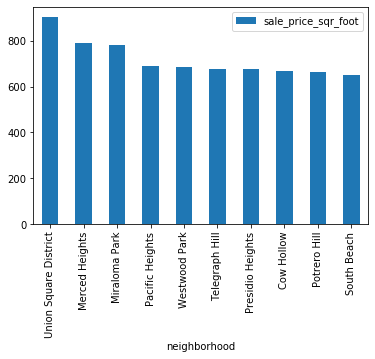

In [53]:
# Plot the results as a bar chart.

multi_group_mean_plot.head(10).plot(kind='bar', y='sale_price_sqr_foot')

- - - 

In [ ]:
# Parallel Coordinates and Parallel Categories Analysis
# use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods.
# Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:

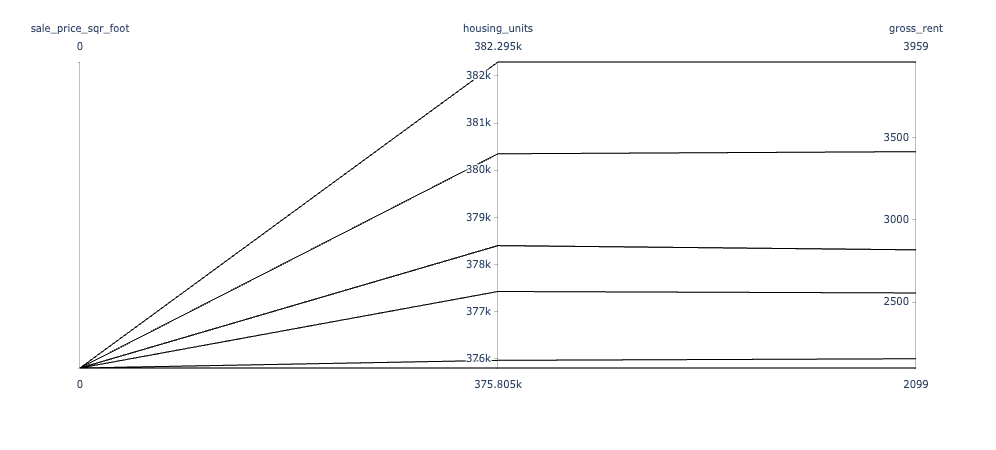

In [97]:
# Create a Parallel Coordinates Plot
px.parallel_coordinates(multi_group_mean_plot, color='sale_price_sqr_foot')

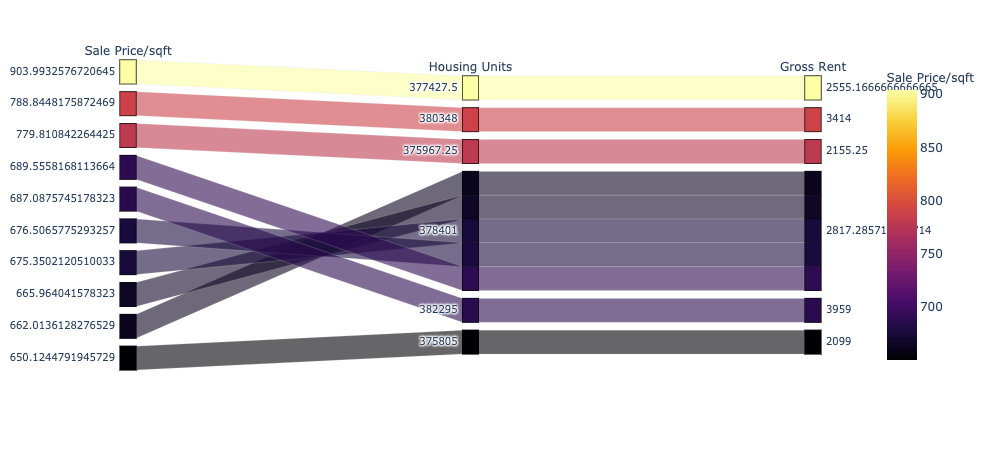

In [55]:
# Parallel Categories Plot

px.parallel_categories(
    multi_group_mean_plot,
    dimensions=["sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "sale_price_sqr_foot": "Sale Price/sqft",
        "housing_units": "Housing Units",
        "gross_rent": "Gross Rent",
    },
)

In [ ]:
# Neighborhood Map
# In this final section, you will read in neighborhood location data and build an interactive map with the average prices per neighborhood. Use a scatter mapbox object from plotly express to create the visualization. 
# Remember, you will need your mapbox API key for this.

In [56]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [111]:
# Join the average values with the neighborhood locations
joined_df = pd.concat([df_neighborhood_locations_mean, multi_group_mean], axis='columns', join='inner')
joined_df.head()

,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


In [110]:
# scatter mapbox to create the visualization.

px.scatter_mapbox(
    joined_df,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    title="Average Sale Price per Square Foot and Gross Rent in San Francisco"
)